In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('train.csv')

# Display the first few rows of the dataset
print("Dataset shape:", data.shape)
print(data.head())


Dataset shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

In [9]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
# Fill missing values in 'Age' with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the mode (most common value)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Check if there are any missing values left
missing_values_after = data.isnull().sum()
print("Missing Values After Filling:")
print(missing_values_after)


Missing Values After Filling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


C:\Users\safur\AppData\Local\Temp\ipykernel_10104\2083238471.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\safur\AppData\Local\Temp\ipykernel_10104\2083238471.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [13]:
# Fill missing values in 'Age' with the median age
data['Age'] = data['Age'].fillna(data['Age'].median())

# Fill missing values in 'Embarked' with the mode (most common value)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Check if there are any missing values left
missing_values_after = data.isnull().sum()
print("Missing Values After Filling:")
print(missing_values_after)


Missing Values After Filling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


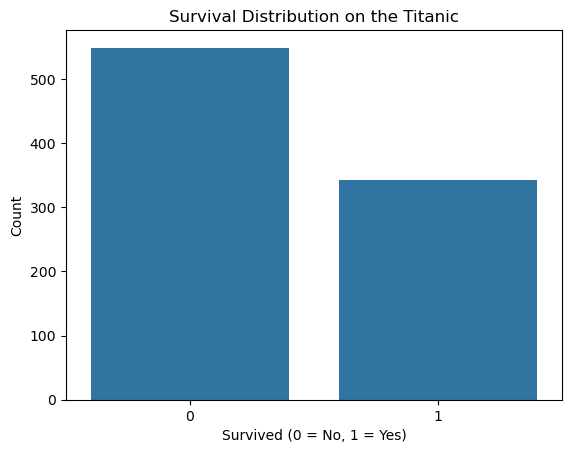

In [15]:
# Visualize the survival distribution
sns.countplot(x='Survived', data=data)
plt.title('Survival Distribution on the Titanic')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


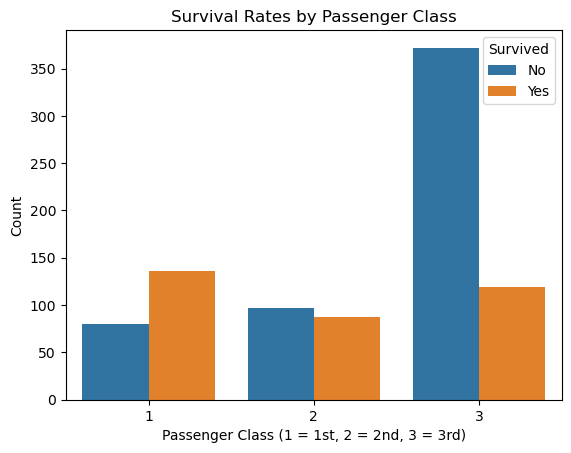

In [17]:
# Visualize survival rates based on passenger class (Pclass)
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


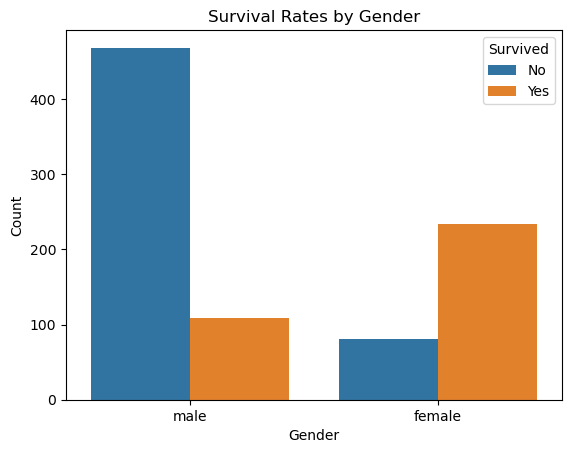

In [19]:
# Visualize survival rates based on gender (Sex)
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


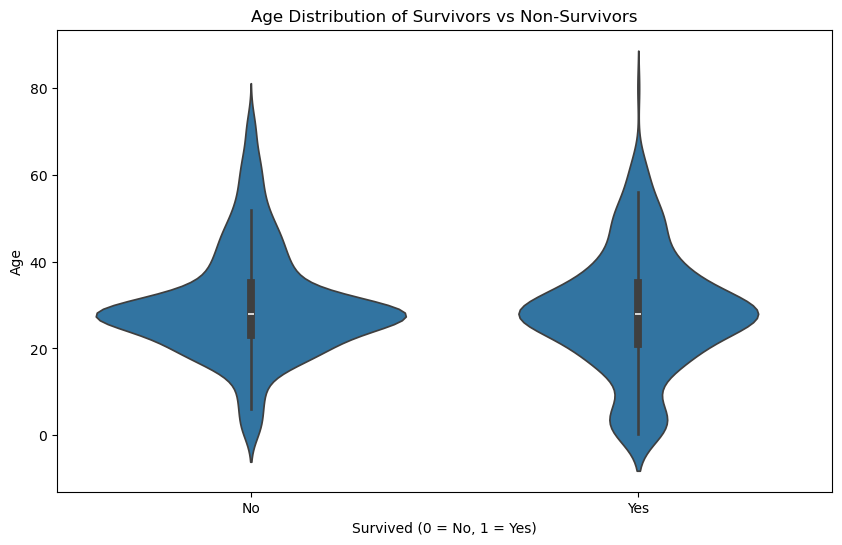

In [21]:
# Visualize age distribution for survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=data)
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [23]:
# Select features and target variable
features = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
target = data['Survived']

# Encode the 'Sex' column
features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})

# Fill missing values in 'Age' and 'Fare' (if any)
features['Age'].fillna(features['Age'].median(), inplace=True)
features['Fare'].fillna(features['Fare'].median(), inplace=True)

# Check for missing values
print(features.isnull().sum())


Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64


C:\Users\safur\AppData\Local\Temp\ipykernel_10104\1465529452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})
C:\Users\safur\AppData\Local\Temp\ipykernel_10104\1465529452.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [25]:
# Select features and target variable
features = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].copy()  # Use .copy() to create a copy

# Encode the 'Sex' column using .loc
features.loc[:, 'Sex'] = features['Sex'].map({'male': 0, 'female': 1})

# Fill missing values in 'Age' and 'Fare' using .loc
features.loc[:, 'Age'] = features['Age'].fillna(features['Age'].median())
features.loc[:, 'Fare'] = features['Fare'].fillna(features['Fare'].median())

# Check for missing values
print(features.isnull().sum())


Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64


In [27]:
!pip install scikit-learn



In [29]:
# Step 1: Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [31]:
# Step 2: Split the dataset into features and target variable
X = features  # Features: the independent variables
y = data['Survived']  # Target variable: what we're trying to predict (Survived)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (712, 6)
Testing set shape: (179, 6)


In [33]:
# Step 3: Build and train the model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Check the model's performance on the training set
train_accuracy = model.score(X_train, y_train)
print("Training accuracy:", train_accuracy)


Training accuracy: 0.9789325842696629


In [35]:
# Step 4: Evaluate the model on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy on the testing set
test_accuracy = model.score(X_test, y_test)
print("Testing accuracy:", test_accuracy)

# Optional: Display the confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Testing accuracy: 0.8044692737430168

Confusion Matrix:
[[90 15]
 [20 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

